## Perform clustering using various distance measure for numerical values   
                                                                                Hare Sankaran RV
                                                                                CSE17119
<img src="SS.png" width="500"/>

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("1.txt",sep="\t",header=None,names=['Column1','Column2'])
print(data.shape)
data.head()

(90, 2)


,Column1,Column2
0,-10.939341,-37.062742
1,-10.939341,-37.062742
2,-10.939324,-37.062765
3,-10.939211,-37.062843
4,-10.938939,-37.062879


In [3]:
X=data.values

In [20]:
idx = np.random.choice(len(data), 3, replace=False)
# Random initial centroids
print(idx)  
XB = np.array([X[idx[0]],X[idx[1]],X[idx[2]]])
XB

[17 24 80]


array([[-10.9414799 , -37.05739138],
       [-10.94153251, -37.05734578],
       [-10.94633251, -37.04587714]])

In [21]:
XA = X

# Euclidean

    Y = cdist(XA, XB, 'euclidean')
    euclidean = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])
    euclidean['nearby']=euclidean.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)
    euclidean[['Column1','Column2']]=data[['Column1','Column2']]
    euclidean = euclidean[['Column1','Column2','D1','D2','D3','nearby']]


    euclidean['nearby'].value_counts()

    XB_copy=np.empty((0,0)) # Empty array
    for i in ['D1','D2','D3']:
        ids = euclidean[euclidean['nearby']==i].index
        new_mean = euclidean.loc[ids].mean()
        XB_copy=np.append(XB_copy,[new_mean[0],new_mean[1]]).reshape(-1,2)

    print("Old Centers\n",XB)        
    print("New Centers\n",XB_copy)    

    XB = XB_copy

In [22]:
Y = cdist(XA, XB, 'euclidean')

In [23]:
XA.shape

(90, 2)

In [24]:
euclidean = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])

In [25]:
euclidean['nearby']=euclidean.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)

In [34]:
euclidean.head(20)

,Column1,Column2,D1,D2,D3,nearby
X1,-10.939341,-37.062742,0.003942,0.012058,0.017875,D1
X2,-10.939341,-37.062742,0.003942,0.012058,0.017875,D1
X3,-10.939324,-37.062765,0.003969,0.012085,0.017902,D1
X4,-10.939211,-37.062843,0.004081,0.012190,0.018018,D1
X5,-10.938939,-37.062879,0.004216,0.012299,0.018154,D1
X6,-10.938544,-37.062839,0.004355,0.012380,0.018275,D1
X7,-10.938346,-37.062588,0.004240,0.012207,0.018129,D1
X8,-10.938448,-37.062000,0.003697,0.011619,0.017553,D1
X9,-10.938666,-37.061499,0.003166,0.011074,0.017007,D1
X10,-10.938986,-37.060819,0.002441,0.010326,0.016256,D1


In [27]:
data.index=['X'+str(i) for i in range(1,91)]
euclidean[['Column1','Column2']]=data[['Column1','Column2']]
euclidean = euclidean[['Column1','Column2','D1','D2','D3','nearby']]
euclidean

,Column1,Column2,D1,D2,D3,nearby
X1,-10.939341,-37.062742,0.005762,0.005824,0.018257,D1
X2,-10.939341,-37.062742,0.005762,0.005824,0.018257,D1
X3,-10.939324,-37.062765,0.005790,0.005852,0.018284,D1
X4,-10.939211,-37.062843,0.005905,0.005968,0.018400,D1
X5,-10.938939,-37.062879,0.006047,0.006111,0.018540,D1
...,...,...,...,...,...,...
X86,-10.947085,-37.045783,0.012891,0.012827,0.000759,D3
X87,-10.947085,-37.045783,0.012891,0.012827,0.000759,D3
X88,-10.947085,-37.045783,0.012891,0.012827,0.000759,D3
X89,-10.947085,-37.045783,0.012891,0.012827,0.000759,D3


In [28]:
euclidean['nearby'].value_counts()

D2    40
D3    32
D1    18
Name: nearby, dtype: int64

In [222]:
# euclidean.loc[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
#        'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
#        'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
#        'X32', 'X33']][['Column1','Column2']].mean()

In [240]:
# np.append(XB,[1,2]).reshape(-1,2)

In [29]:
XB_copy=np.empty((0,0)) # Empty array
for i in ['D1','D2','D3']:
    ids = euclidean[euclidean['nearby']==i].index
    new_mean = euclidean.loc[ids].mean()
    XB_copy=np.append(XB_copy,[new_mean[0],new_mean[1]]).reshape(-1,2)

print("Old Centers\n",XB)        
print("New Centers\n",XB_copy)    

XB = XB_copy

Old Centers
 [[-10.9414799  -37.05739138]
 [-10.94153251 -37.05734578]
 [-10.94633251 -37.04587714]]
New Centers
 [[-10.93954783 -37.06069272]
 [-10.94213427 -37.05352219]
 [-10.94481668 -37.04773741]]


# Red Color Points in next cell plots are cluster centers

Iteration:-- 0
Current Cluster Counts
 D2    48
D3    24
D1    18
Name: nearby, dtype: int64
Old Centers
 [[-10.93954783 -37.06069272]
 [-10.94213427 -37.05352219]
 [-10.94481668 -37.04773741]]
New Centers
 [[-10.93954783 -37.06069272]
 [-10.94231367 -37.05310247]
 [-10.94535201 -37.04664859]]
Iteration:-- 1
Current Cluster Counts
 D2    41
D1    27
D3    22
Name: nearby, dtype: int64
Old Centers
 [[-10.93954783 -37.06069272]
 [-10.94231367 -37.05310247]
 [-10.94535201 -37.04664859]]
New Centers
 [[-10.94020975 -37.05957678]
 [-10.94246027 -37.0519995 ]
 [-10.94567415 -37.04638186]]
Iteration:-- 2
Current Cluster Counts
 D2    39
D1    31
D3    20
Name: nearby, dtype: int64
Old Centers
 [[-10.94020975 -37.05957678]
 [-10.94246027 -37.0519995 ]
 [-10.94567415 -37.04638186]]
New Centers
 [[-10.94047524 -37.05920937]
 [-10.94248198 -37.05134516]
 [-10.9459918  -37.04615008]]
Iteration:-- 3
Current Cluster Counts
 D2    37
D1    33
D3    20
Name: nearby, dtype: int64
Old Centers
 [[-10.940

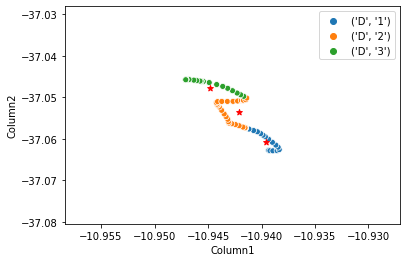

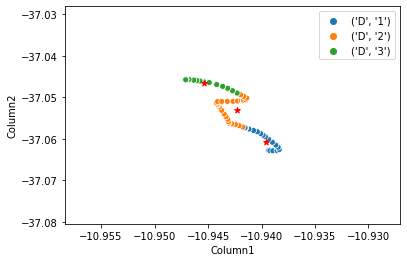

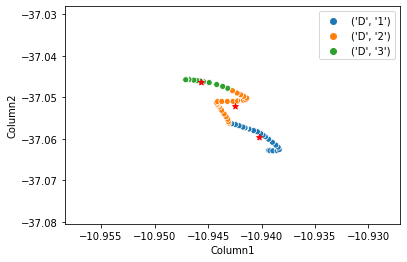

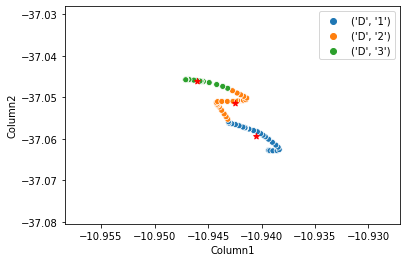

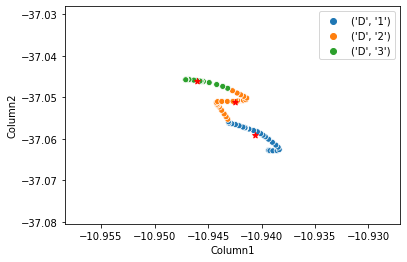

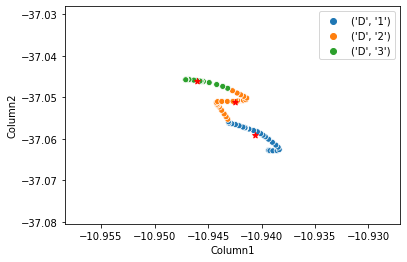

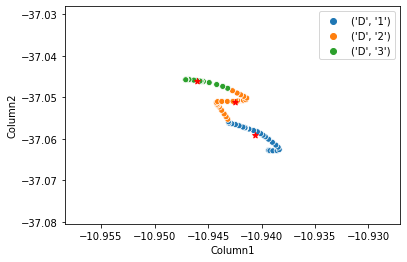

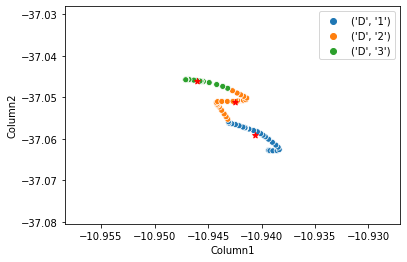

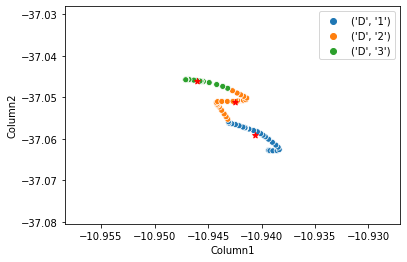

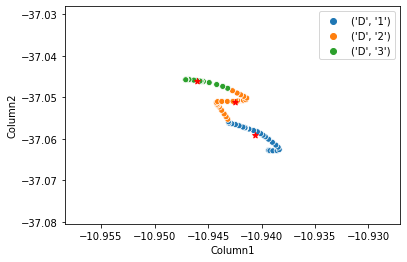

In [30]:
for i in range(10):
    print("Iteration:--",i)
    Y = cdist(XA, XB, 'euclidean')
    euclidean = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])
    euclidean['nearby']=euclidean.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)
    euclidean[['Column1','Column2']]=data[['Column1','Column2']]
    euclidean = euclidean[['Column1','Column2','D1','D2','D3','nearby']]
    plt.figure()
    sns.scatterplot(data=euclidean,x=euclidean['Column1'],y=euclidean['Column2'],hue=euclidean['nearby'])
    plt.scatter(x=XB[:,0], y=XB[:,1], color='r',marker='*')
    print("Current Cluster Counts\n",euclidean['nearby'].value_counts())

    XB_copy=np.empty((0,0)) # Empty array
    for i in ['D1','D2','D3']:
        ids = euclidean[euclidean['nearby']==i].index
        new_mean = euclidean.loc[ids].mean()
        XB_copy=np.append(XB_copy,[new_mean[0],new_mean[1]]).reshape(-1,2)

    print("Old Centers\n",XB)        
    print("New Centers\n",XB_copy)    

    XB = XB_copy

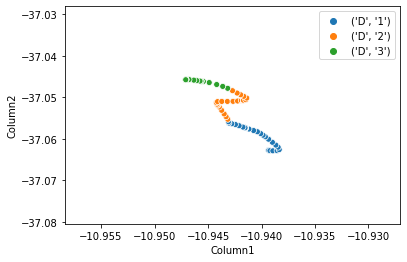

In [32]:
#After End of 10 Iterations

sns.scatterplot(data=euclidean,x=euclidean['Column1'],y=euclidean['Column2'],hue=euclidean['nearby'])

# Manhattan

In [68]:
Y = cdist(XA, XB, 'cityblock')

In [69]:
manhattan = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])

In [70]:
manhattan['nearby']=manhattan.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)

In [72]:
manhattan['nearby'].value_counts()

D2    55
D3    20
D1    15
Name: nearby, dtype: int64

In [73]:
manhattan.sample(10)

,D1,D2,D3,nearby
X90,0.024743,0.012654,0.000000,D3
X43,0.016507,0.004418,0.008236,D2
X40,0.015709,0.003620,0.009034,D2
X52,0.014435,0.005577,0.010308,D2
X82,0.024496,0.012406,0.000364,D3
X74,0.021870,0.009781,0.002873,D3
X64,0.014435,0.005577,0.010308,D2
X76,0.022972,0.010883,0.001771,D3
X77,0.022972,0.010883,0.001771,D3
X26,0.007627,0.004462,0.017116,D2


[[-10.94408881 -37.05191634]
 [-10.94195255 -37.04939389]
 [-10.94117939 -37.05763973]]


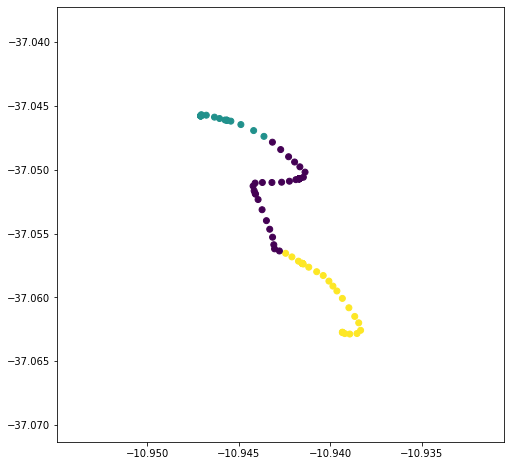

In [129]:
P=kmeans(X,'cityblock')
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=P)
plt.show()

# Chebyshev

In [74]:
Y = cdist(XA, XB, 'chebyshev')

In [75]:
Chebyshev = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])

In [76]:
Chebyshev['nearby']=Chebyshev.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)

In [77]:
Chebyshev['nearby'].value_counts()

D2    53
D3    23
D1    14
Name: nearby, dtype: int64

In [83]:
Chebyshev.sample(10)

,D1,D2,D3,nearby
X57,0.012062,0.003962,0.005388,D2
X2,0.000022,0.008078,0.016959,D1
X80,0.016780,0.008680,0.001030,D3
X15,0.004474,0.003626,0.012508,D2
X66,0.012578,0.004478,0.005703,D2
X48,0.011988,0.003888,0.005202,D2
X90,0.016982,0.008882,0.000000,D3
X77,0.016645,0.008545,0.001434,D3
X32,0.006564,0.001536,0.010418,D2
X85,0.016982,0.008882,0.000000,D3


[[-10.93964144 -37.0595031 ]
 [-10.94153251 -37.05734578]
 [-10.94117939 -37.05763973]]


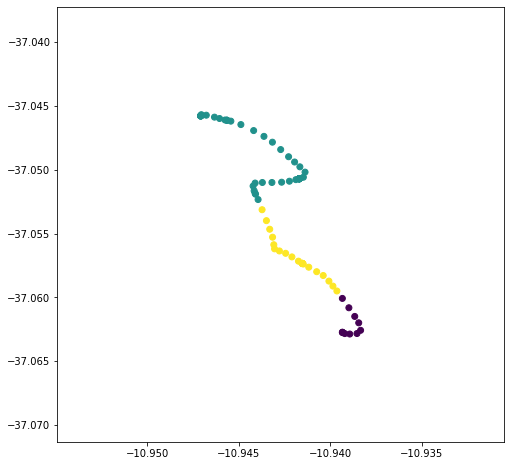

In [134]:
P=kmeans(X,'chebyshev')
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=P)
plt.show()

# Minkowski

In [78]:
Y = cdist(XA, XB, 'minkowski', p=2.)

In [80]:
Minkowski = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])

In [81]:
Minkowski['nearby']=Minkowski.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)

In [82]:
Minkowski['nearby'].value_counts()

D2    53
D3    22
D1    15
Name: nearby, dtype: int64

In [84]:
Minkowski.sample(10)

,D1,D2,D3,nearby
X55,0.012293,0.004278,0.007296,D2
X62,0.012293,0.004278,0.007296,D2
X39,0.011848,0.002856,0.006826,D2
X25,0.005852,0.003219,0.012827,D2
X76,0.017807,0.008859,0.001473,D3
X9,0.001426,0.008265,0.017829,D1
X64,0.012293,0.004278,0.007296,D2
X5,0.000402,0.009306,0.018937,D1
X56,0.012293,0.004278,0.007296,D2
X53,0.012293,0.004278,0.007296,D2


[[-10.94169743 -37.05070298]
 [-10.94708532 -37.04578286]
 [-10.94362763 -37.04738422]]


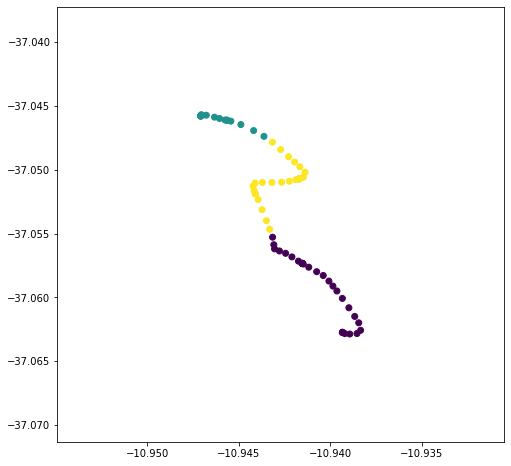

In [135]:
P=kmeans(X,'minkowski')
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=P)
plt.show()

# DTW

In [96]:
def DTW(a, b):   
    an = a.size
    bn = b.size
    pointwise_distance = distance.cdist(a.reshape(-1,1),b.reshape(-1,1))
    cumdist = np.matrix(np.ones((an+1,bn+1)) * np.inf)
    cumdist[0,0] = 0

    for ai in range(an):
        for bi in range(bn):
            minimum_cost = np.min([cumdist[ai, bi+1],
                                   cumdist[ai+1, bi],
                                   cumdist[ai, bi]])
            cumdist[ai+1, bi+1] = pointwise_distance[ai,bi] + minimum_cost

    return cumdist[an, bn]

In [101]:
for i in XA:
    print(dtw(XB[0],i))


[[0.00000000e+00            inf            inf]
 [           inf 1.74400000e-05 2.61234356e+01]
 [           inf 2.61234406e+01 3.98400000e-05]]
[[0.00000000e+00            inf            inf]
 [           inf 1.74400000e-05 2.61234356e+01]
 [           inf 2.61234406e+01 3.98400000e-05]]
[[ 0.                 inf         inf]
 [        inf  0.         26.12344056]
 [        inf 26.12344056  0.        ]]
[[0.00000000e+00            inf            inf]
 [           inf 1.13390000e-04 2.61236325e+01]
 [           inf 2.61236673e+01 1.91930000e-04]]
[[0.00000000e+00            inf            inf]
 [           inf 3.84970000e-04 2.61239396e+01]
 [           inf 2.61242105e+01 4.99060000e-04]]
[[0.00000000e+00            inf            inf]
 [           inf 7.80360000e-04 2.61242951e+01]
 [           inf 2.61250013e+01 8.54510000e-04]]
[[0.00000000e+00            inf            inf]
 [           inf 9.77890000e-04 2.61242415e+01]
 [           inf 2.61253963e+01 1.15484000e-03]]
[[0.00000000

# Fretchet

In [100]:
!pip install frechetdist
from frechetdist import frdist

In [102]:
def frechetdist(pointa,pointb):
    return frdist([pointa],[pointb])

In [103]:
Y = cdist(XA,XB,metric= lambda x,y:frechetdist(x,y))

In [105]:
Frechet = pd.DataFrame(Y,columns=['D1','D2','D3'],index=['X'+str(i) for i in range(1,91)])

In [108]:
Frechet['nearby']=Frechet.apply(lambda x:'D1' if min(x)==x.D1 else 'D2' if min(x)==x.D2 else 'D3',axis=1)

In [109]:
Frechet['nearby'].value_counts()

D2    53
D3    22
D1    15
Name: nearby, dtype: int64

In [110]:
Frechet.sample(10)

,D1,D2,D3,nearby
X33,0.007848,0.001235,0.010858,D2
X16,0.004980,0.004203,0.013757,D2
X37,0.010591,0.001587,0.008080,D2
X51,0.012293,0.004278,0.007296,D2
X48,0.012258,0.004143,0.007211,D2
X52,0.012293,0.004278,0.007296,D2
X3,0.000000,0.009029,0.018671,D1
X35,0.009029,0.000000,0.009650,D2
X2,0.000028,0.009001,0.018644,D1
X7,0.000994,0.009351,0.018941,D1


# Generate disimilarity matrix and clustering using various distance measures given 
*group1 --> astounding, angel, dissolve, sabotage, village, homeless, speed, muscular, flap, apparent*

In [113]:
import numpy as np

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [115]:
l = ["astounding", "angel", "dissolve", "sabotage", "village", "homeless", "speed", "muscular", "flap", "apparent"]

In [118]:
for i in l:
    for j in l:
        print("Levenshtein for ",i,j)
        levenshtein(i,j)

Levenshtein for  astounding astounding
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 2.  1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 3.  2.  1.  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 4.  3.  2.  1.  0.  1.  2.  3.  4.  5.  6.]
 [ 5.  4.  3.  2.  1.  0.  1.  2.  3.  4.  5.]
 [ 6.  5.  4.  3.  2.  1.  0.  1.  2.  3.  4.]
 [ 7.  6.  5.  4.  3.  2.  1.  0.  1.  2.  3.]
 [ 8.  7.  6.  5.  4.  3.  2.  1.  0.  1.  2.]
 [ 9.  8.  7.  6.  5.  4.  3.  2.  1.  0.  1.]
 [10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]]
Levenshtein for  astounding angel
[[ 0.  1.  2.  3.  4.  5.]
 [ 1.  0.  1.  2.  3.  4.]
 [ 2.  1.  1.  2.  3.  4.]
 [ 3.  2.  2.  2.  3.  4.]
 [ 4.  3.  3.  3.  3.  4.]
 [ 5.  4.  4.  4.  4.  4.]
 [ 6.  5.  4.  5.  5.  5.]
 [ 7.  6.  5.  5.  6.  6.]
 [ 8.  7.  6.  6.  6.  7.]
 [ 9.  8.  7.  7.  7.  7.]
 [10.  9.  8.  7.  8.  8.]]
Levenshtein for  astounding dissolve
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  1.  2.  3.  4.  5.  6.  7.  

# Inbuilt K Means Visualization

In [22]:
from sklearn.cluster import KMeans

In [24]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

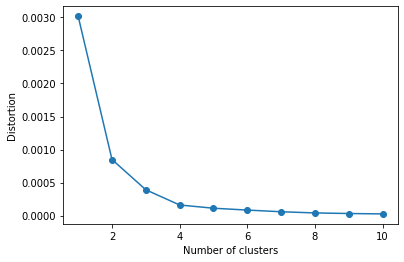

In [28]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

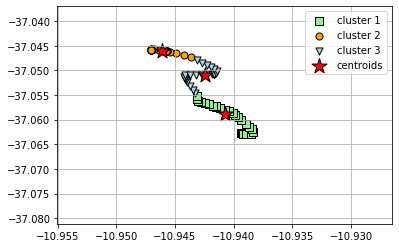

In [27]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()